# **Analisis Exploratorio**

In [1]:
import pandas as pd

In [2]:
pd.set_option("display.max_columns", 200)
df = pd.read_csv("../data/raw/flight_data_2024.csv")
df.shape, df.head(3)

C:\Users\SamuelMejia\AppData\Local\Temp\ipykernel_33768\257572133.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/flight_data_2024.csv")


((7079081, 35),
    year  month  day_of_month  day_of_week     fl_date op_unique_carrier  \
 0  2024      1             1            1  2024-01-01                9E   
 1  2024      1             1            1  2024-01-01                9E   
 2  2024      1             1            1  2024-01-01                9E   
 
    op_carrier_fl_num origin origin_city_name origin_state_nm dest  \
 0             4814.0    JFK     New York, NY        New York  DTW   
 1             4815.0    MSP  Minneapolis, MN       Minnesota  CLE   
 2             4817.0    JFK     New York, NY        New York  RIC   
 
   dest_city_name dest_state_nm  crs_dep_time  dep_time  dep_delay  taxi_out  \
 0    Detroit, MI      Michigan          1252    1247.0       -5.0      31.0   
 1  Cleveland, OH          Ohio          1015    1001.0      -14.0      20.0   
 2   Richmond, VA      Virginia          1415    1411.0       -4.0      21.0   
 
    wheels_off  wheels_on  taxi_in  crs_arr_time  arr_time  arr_delay  \
 

In [3]:
# Tipos, nulos, memoria
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079081 entries, 0 to 7079080
Data columns (total 35 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day_of_month         int64  
 3   day_of_week          int64  
 4   fl_date              object 
 5   op_unique_carrier    object 
 6   op_carrier_fl_num    float64
 7   origin               object 
 8   origin_city_name     object 
 9   origin_state_nm      object 
 10  dest                 object 
 11  dest_city_name       object 
 12  dest_state_nm        object 
 13  crs_dep_time         int64  
 14  dep_time             float64
 15  dep_delay            float64
 16  taxi_out             float64
 17  wheels_off           float64
 18  wheels_on            float64
 19  taxi_in              float64
 20  crs_arr_time         int64  
 21  arr_time             float64
 22  arr_delay            float64
 23  cancelled            int64  
 24

**Las variables eligidas como features para el modelo son:**
<br> 
Contexto temporal:
<br> 
day_of_month<br> 
day_of_week<br> 
fl_date<br> 

Aerolínea:<br>op_unique_carrier 

Ruta:
<br> 
origin<br> 
dest<br> 
distance<br> 

Horario:<br> 
crs_dep_time 

In [4]:
DELAY_THRESHOLD = 15

df_model = df.copy()
df_model = df[(df["cancelled"] == 0) & (df["diverted"] == 0)].copy()
df_model["target_delay"] = (df_model["arr_delay"] >= DELAY_THRESHOLD).astype(int) 

Se creo una nueva columna porque necesitamos una etiqueta (target) lista para entrenamiento en clasificación binaria: “¿se retrasó o no?”.


In [5]:
excluded = ((df["cancelled"] == 1) | (df["diverted"] == 1)).mean()
excluded


np.float64(0.016077510626026175)

In [6]:
df_model.head(3)

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,dest,dest_city_name,dest_state_nm,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,target_delay
0,2024,1,1,1,2024-01-01,9E,4814.0,JFK,"New York, NY",New York,DTW,"Detroit, MI",Michigan,1252,1247.0,-5.0,31.0,1318.0,1442.0,7.0,1508,1449.0,-19.0,0,NaN,0,136.0,122.0,84.0,509.0,0,0,0,0,0,0
1,2024,1,1,1,2024-01-01,9E,4815.0,MSP,"Minneapolis, MN",Minnesota,CLE,"Cleveland, OH",Ohio,1015,1001.0,-14.0,20.0,1021.0,1249.0,6.0,1325,1255.0,-30.0,0,NaN,0,130.0,114.0,88.0,622.0,0,0,0,0,0,0
2,2024,1,1,1,2024-01-01,9E,4817.0,JFK,"New York, NY",New York,RIC,"Richmond, VA",Virginia,1415,1411.0,-4.0,21.0,1432.0,1533.0,8.0,1601,1541.0,-20.0,0,NaN,0,106.0,90.0,61.0,288.0,0,0,0,0,0,0


In [7]:
variables = ['day_of_month', 'day_of_week', 'origin', 'dest', 'distance', 'fl_date', 'crs_dep_time', 'op_unique_carrier']

df_var = df_model[variables + ["target_delay"]].copy()
df_var.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6965267 entries, 0 to 7079080
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   day_of_month       int64  
 1   day_of_week        int64  
 2   origin             object 
 3   dest               object 
 4   distance           float64
 5   fl_date            object 
 6   crs_dep_time       int64  
 7   op_unique_carrier  object 
 8   target_delay       int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 531.4+ MB


**Variables**<br>
*categóricas* = origin, dest, fl_date, op_unique_carrier<br>
*numéricas* = day_of_month, day_of_week, distance, crs_dep_time

### **Variables Numericas**

In [8]:
t = df_model["crs_dep_time"].astype(int)
df_model["sched_hour"] = t // 100
df_model["sched_min"]  = t % 100
df_model["sched_minute_of_day"] = df_model["sched_hour"]*60 + df_model["sched_min"]

````crs_dep_time```` viene como HHMM (por ejemplo 530, 1430), pero para calcular sched_hour y sched_min primero se convierte a entero y se guarda en t. Luego se hace:<br>
​

````sched_hour = t // 100```` → quita los minutos y deja solo la hora (5, 14, etc.).<br>
​

````sched_min = t % 100```` → se queda con los minutos (30, 45, etc.).<br>
​

````sched_minute_of_day = sched_hour * 60 + sched_min```` → convierte toda la hora programada a “minutos desde medianoche”, que sí es una escala numérica más razonable para análisis/modelo.
​

In [9]:
df_model["fl_date"] = pd.to_datetime(df_model["fl_date"], errors="coerce")
df_model["month"] = df_model["fl_date"].dt.month

In [10]:
variables = ['day_of_month', 'month', 'day_of_week', 'fl_date', 'origin', 'dest', 'distance', 'crs_dep_time', 
             'sched_hour','sched_minute_of_day', 'op_unique_carrier']
df_var = df_model[variables + ["target_delay"]].copy()
df_var.head(3)

,day_of_month,month,day_of_week,fl_date,origin,dest,distance,crs_dep_time,sched_hour,sched_minute_of_day,op_unique_carrier,target_delay
0,1,1,1,2024-01-01,JFK,DTW,509.0,1252,12,772,9E,0
1,1,1,1,2024-01-01,MSP,CLE,622.0,1015,10,615,9E,0
2,1,1,1,2024-01-01,JFK,RIC,288.0,1415,14,855,9E,0


In [11]:
base_rate = df_model["target_delay"].mean()
base_rate

np.float64(0.20817177575532997)

In [12]:
df_model["distance_bin"] = pd.qcut(df_model["distance"], q=10, duplicates="drop")
(df_model.groupby("distance_bin")["target_delay"]
        .agg(rate="mean", n="size")
        .sort_values("distance_bin"))


C:\Users\SamuelMejia\AppData\Local\Temp\ipykernel_33768\3178324280.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df_model.groupby("distance_bin")["target_delay"]


,rate,n
distance_bin,,
"(10.999, 235.0]",0.188254,704092
"(235.0, 342.0]",0.198525,691317
"(342.0, 447.0]",0.200054,706503
"(447.0, 575.0]",0.198287,685838
"(575.0, 680.0]",0.209692,711426
"(680.0, 846.0]",0.208578,687260
"(846.0, 989.0]",0.220482,695584
"(989.0, 1189.0]",0.228512,696610
"(1189.0, 1660.0]",0.220080,697610


Nota: <br>
“La distancia del vuelo muestra variaciones moderadas en la tasa de retraso (≈19–22%), sin relación monotónica clara; se incluye como feature, pero se espera que tenga menor importancia que hora de salida, aeropuerto y aerolínea.”
​

In [13]:
(df_model.groupby("sched_hour")["target_delay"]
        .agg(rate="mean", n="size")
        .sort_index())


,rate,n
sched_hour,,
0,0.200215,12102
1,0.212697,4001
2,0.207809,1511
3,0.194574,1069
4,0.201521,526
5,0.090566,197159
6,0.095778,487660
7,0.122921,486842
8,0.138629,476025


Nota: <br>
la probabilidad de retraso aumenta claramente a medida que avanza el día, sobre todo desde el mediodía en adelante.

In [14]:
(df_model.groupby("day_of_week")["target_delay"]
        .agg(rate="mean", n="size")
        .sort_index())

,rate,n
day_of_week,,
1,0.205548,1056398
2,0.179246,961064
3,0.186741,958699
4,0.218830,1024394
5,0.233285,1037087
6,0.204079,898255
7,0.225493,1029370


Nota: <br>
El efecto es moderado comparado con la hora del dia, los jueves y sabados presentan los valores mas altos.

In [15]:
(df_model.groupby("day_of_month")["target_delay"]
        .agg(rate="mean", n="size")
        .sort_index())

,rate,n
day_of_month,,
1,0.180488,229445
2,0.195942,228808
3,0.202240,226350
4,0.192902,221740
5,0.207515,223295
6,0.203162,224712
7,0.209644,227843
8,0.213383,232989
9,0.228520,223998


Nota: <br>
La tasa mínima está cerca de 0.18 (días 1, 13, 31) y la máxima alrededor de 0.226–0.227 (días 19 y 22), o sea el rango va aproximadamente de 18% a 22.7%.


### **Variables Categoricas**

In [16]:
def rate_table(df_, col, min_n=5000):
    out = (df_.groupby(col)["target_delay"]
              .agg(rate="mean", n="size")
              .query("n >= @min_n")
              .sort_values("rate", ascending=False))
    return out

rate_table(df_model, "op_unique_carrier", min_n=20000)


,rate,n
op_unique_carrier,,
F9,0.287401,203482
AA,0.261340,966116
B6,0.255093,235683
NK,0.239261,255633
AS,0.220720,240323
OH,0.217702,223673
G4,0.216718,114882
MQ,0.208603,275317
WN,0.206048,1404597


La tabla está ordenada de mayor a menor rate. La aerolinea con mayor retraso.

In [17]:
rate_table(df_model, "origin", min_n=30000).head(15)

,rate,n
origin,,
MIA,0.278318,107722
DFW,0.271032,306872
CLT,0.270411,214096
FLL,0.267341,90121
SJU,0.257786,34804
BWI,0.245735,97251
MCO,0.244122,156258
IAH,0.243960,113248
ORD,0.236929,275505


In [18]:
rate_table(df_model, "dest", min_n=30000).head(15)

,rate,n
dest,,
SFO,0.298412,132917
SJU,0.264624,34959
FLL,0.246969,90137
SAN,0.242722,93160
DFW,0.241808,306222
TPA,0.239779,76362
MCO,0.237509,156036
MIA,0.234124,107678
SAT,0.233670,41105


In [19]:
pivot = (df_model.pivot_table(index="origin", columns="sched_hour",
                              values="target_delay", aggfunc="mean"))
pivot.loc[pivot.index[:10], :10]  


sched_hour,0,1,2,3,4,5,6,7,8,9,10
origin,,,,,,,,,,,
ABE,NaN,NaN,NaN,NaN,NaN,0.000000,0.105108,0.106918,0.077810,0.172840,0.093525
ABI,NaN,NaN,NaN,NaN,NaN,0.046729,0.140704,NaN,0.111801,0.063492,0.173333
ABQ,0.0,NaN,NaN,NaN,NaN,0.064566,0.082151,0.073330,0.116814,0.108911,0.123580
ABR,NaN,NaN,NaN,NaN,NaN,NaN,0.119444,NaN,1.000000,NaN,NaN
ABY,NaN,NaN,NaN,NaN,NaN,NaN,0.142857,0.234450,0.260274,NaN,NaN
ACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.216216
ACT,NaN,NaN,NaN,NaN,NaN,0.163636,0.133333,NaN,NaN,0.142857,0.230769
ACV,NaN,NaN,NaN,NaN,NaN,0.088889,0.119342,0.230769,0.480000,NaN,NaN
ACY,NaN,NaN,NaN,NaN,NaN,0.099462,0.094059,0.072464,0.178571,0.142157,0.170455


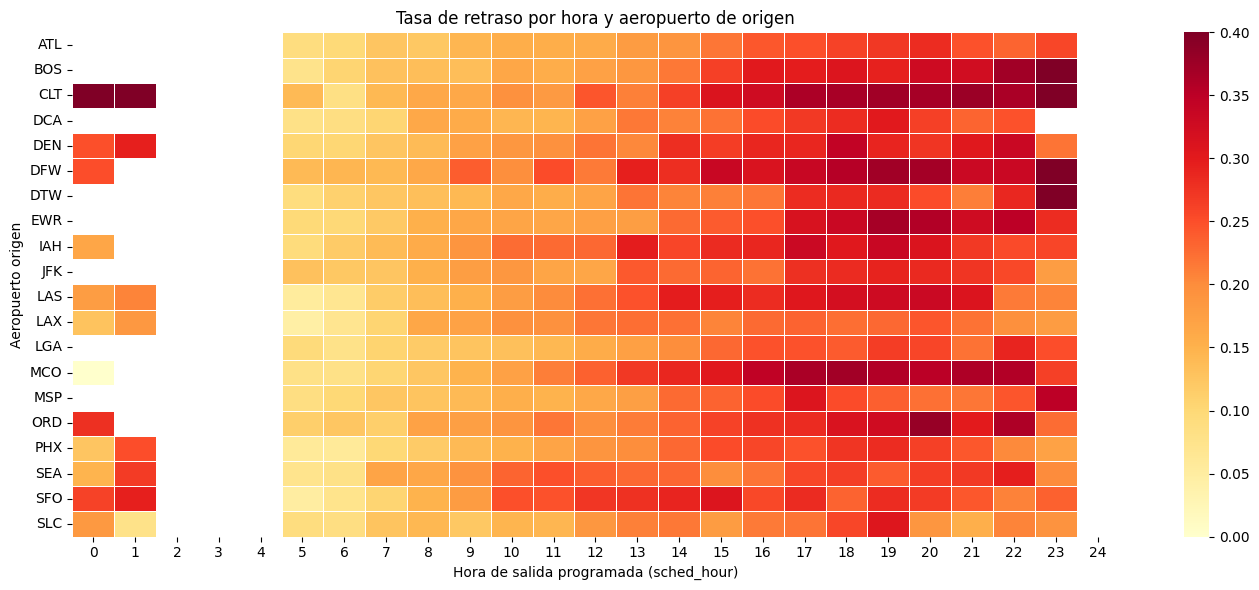

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

top_n = 20
origin_counts = df_model["origin"].value_counts()
top_origins = origin_counts.head(top_n).index

pivot_top = pivot.loc[pivot.index.intersection(top_origins)]
pivot_top = pivot_top.sort_index()  

plt.figure(figsize=(14, 6))

sns.heatmap(
    pivot_top,
    cmap="YlOrRd",
    vmin=0, vmax=0.4,        
    linewidths=0.5,
    linecolor="white"
)

plt.title("Tasa de retraso por hora y aeropuerto de origen")
plt.xlabel("Hora de salida programada (sched_hour)")
plt.ylabel("Aeropuerto origen")
plt.tight_layout()
plt.show()

Una celda rojo oscuro cerca de 0.35 significa que, para ese aeropuerto de origen y esa hora programada, aproximadamente 35% de los vuelos llegaron con retraso (arr_delay ≥ 15).<br>
“Si en CLT o MCO entre 17–21 h observas valores 0.35–0.40, se interpreta como un 35–40% de probabilidad de llegada retrasada para vuelos programados en esa franja, comparado con tasas más bajas en la mañana”.

In [21]:
# Aerolinea x hora 
(df_model.groupby(["op_unique_carrier", "sched_hour"])["target_delay"]
        .agg(rate="mean", n="size")
        .query("n >= 5000")
        .sort_values("rate", ascending=False)
        .head(20))

rate      n
op_unique_carrier sched_hour                 
AA                19          0.389570  52463
                  20          0.389219  45838
F9                19          0.386257  10260
WN                22          0.380086  19393
F9                18          0.378812  11346
                  17          0.376715  11080
AA                18          0.375899  61019
WN                21          0.374577  44605
F9                20          0.369143   9625
                  22          0.364455  10443
B6                21          0.364031   8057
F9                21          0.363093   9532
AA                17          0.362760  53716
F9                16          0.359315  12034
B6                17          0.348391  12928
AA                16          0.348280  54706
B6                18          0.346480  12982
NK                18          0.341675  14985
B6                19          0.340450  12974
F9                15          0.339238  11856

Vemos en cada aerolinea, que el riesgo de retraso sube en las franjas horarias señaladas en el df

### **Variables como features**

`categoricas = ["origin", "dest", "op_unique_carrier"]`

`numericas = ["month", "day_of_week", "distance", "sched_hour"]`